<a href="https://colab.research.google.com/github/arushikashyap1/PRODIGY_DS_03/blob/main/Prodigy_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

In [22]:
data = pd.read_csv('/content/Bank-dataset.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [25]:
data.shape

(45211, 17)

In [26]:
data.size

768587

In [27]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [28]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [30]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'deposit'


data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)



# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
10747,36,0,17,153,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26054,56,196,19,312,3,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
9125,46,0,5,83,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
41659,41,3426,1,302,1,119,5,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4443,38,0,20,90,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,2093,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
44732,23,508,8,210,1,92,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38158,34,1317,15,239,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
860,33,165,7,111,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
X_train
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3776,40,580,16,192,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
9928,47,3644,9,83,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
33409,25,538,20,226,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31885,42,1773,9,311,1,336,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15738,56,217,21,121,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,46,2800,5,47,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
380,38,757,6,133,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7713,41,4539,30,298,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
12188,41,1309,20,28,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [32]:
y_train

10747     no
26054     no
9125      no
41659     no
4443      no
        ... 
11284    yes
44732     no
38158     no
860       no
15795     no
Name: deposit, Length: 31647, dtype: object

In [35]:
y_test

3776     no
9928     no
33409    no
31885    no
15738    no
         ..
9016     no
380      no
7713     no
12188    no
28550    no
Name: deposit, Length: 13564, dtype: object

In [36]:
clf = DecisionTreeClassifier(random_state=42)


clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8720141551164848


In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[11086   880]
 [  856   742]]


In [40]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.93      0.93     11966
         yes       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



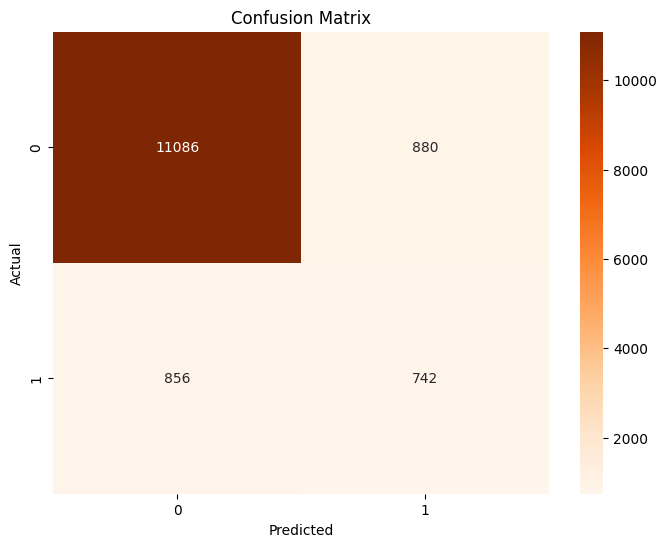

In [41]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
tree_structure = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_structure)

Decision Tree Structure:
|--- duration <= 510.50
|   |--- poutcome_success <= 0.50
|   |   |--- age <= 60.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- duration <= 203.50
|   |   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |   |--- duration <= 140.50
|   |   |   |   |   |   |   |--- age <= 26.50
|   |   |   |   |   |   |   |   |--- housing_yes <= 0.50
|   |   |   |   |   |   |   |   |   |--- duration <= 88.50
|   |   |   |   |   |   |   |   |   |   |--- job_unemployed <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |   |   |--- job_unemployed >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- duration >  88.50
|   |   |   |   |   |   |   |   |   |   |--- month_may <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- month_may >  0.50
|   |   |   |   |   |   |   